**<h1>Exploratory Data Analysis - Haberman's Survival dataset**






Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set

**Goal : To predict that a person would survive or not from surgery**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading data to pandas dataframe
data = pd.read_csv('/content/haberman.csv')

#printing first 10 rows
print(data.head(10)) 
print('\n')
print(data.columns, end = '\n\n')
print(data.shape, end = '\n\n')

#renaming columns
#data.columns({'Age', 'Oper_year', 'Axil_nodes', 'Survival_status'}, inplace = True)
data = data.rename(columns={'30': "Age", '64': "Oper_year", '1': "Axil_nodes", '1.1': "Survival_status"}) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
print(data.head(10))

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1
5  33  60   0    1
6  34  59   0    2
7  34  66   9    2
8  34  58  30    1
9  34  60   1    1


Index(['30', '64', '1', '1.1'], dtype='object')

(305, 4)

   Age  Oper_year  Axil_nodes  Survival_status
0   30         62           3                1
1   30         65           0                1
2   31         59           2                1
3   31         65           4                1
4   33         58          10                1
5   33         60           0                1
6   34         59           0                2
7   34         66           9                2
8   34         58          30                1
9   34         60           1                1


In [4]:
#unique values and its count of Survival_status column
data['Survival_status'].value_counts()
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year

1    224
2     81
Name: Survival_status, dtype: int64

**Observations:**

1. Survival status of surgery success(1) is almost 2.5 times compare to failure(2) 
2. Data is not uniformly distributed 

**<h1>Univariate plotting</h1>**

In [5]:
survived = data.loc[data['Survival_status'] == 1]
not_survived = data.loc[data['Survival_status'] == 2]

print(type(survived))
print(survived.head(10))

print(type(not_survived))
print(not_survived.head(10))

<class 'pandas.core.frame.DataFrame'>
    Age  Oper_year  Axil_nodes  Survival_status
0    30         62           3                1
1    30         65           0                1
2    31         59           2                1
3    31         65           4                1
4    33         58          10                1
5    33         60           0                1
8    34         58          30                1
9    34         60           1                1
10   34         61          10                1
11   34         67           7                1
<class 'pandas.core.frame.DataFrame'>
    Age  Oper_year  Axil_nodes  Survival_status
6    34         59           0                2
7    34         66           9                2
23   38         69          21                2
33   39         66           0                2
42   41         60          23                2
43   41         64           0                2
44   41         67           0                2
52   42     

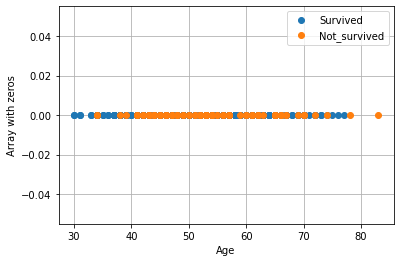

In [6]:
plt.plot(survived["Age"], np.zeros_like(survived['Age']), 'o', label = 'Survived') # https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
plt.plot(not_survived["Age"], np.zeros_like(not_survived['Age']), 'o', label = 'Not_survived') 
#plt.legend('Survived', 'Not_survived')

#adding axis label and display label 
plt.xlabel('Age') 
plt.ylabel('Array with zeros') 
plt.legend()  #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

plt.grid() #to display grids in the output
plt.show() #to display plot(output)

**Observation:**

1. Dots of survived values are overwritten by not survived values- so it impossible to recognize survival status 

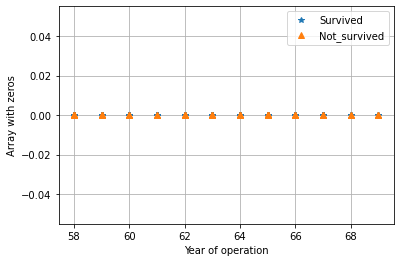

In [7]:
plt.plot(survived['Oper_year'], np.zeros_like(survived['Oper_year']), '*', label = 'Survived') 
plt.plot(not_survived['Oper_year'], np.zeros_like(not_survived['Oper_year']), '^', label = 'Not_survived') 


#adding axis label and display label 
plt.xlabel('Year of operation') 
plt.ylabel('Array with zeros') 
plt.legend()  

plt.grid()
plt.show() 

**Observations:**

1. Both classes overlap each other and so age attribute should not be given much importance for survival rate or non_survival rate
2. Dataset contains age ranging from 58 to 70 

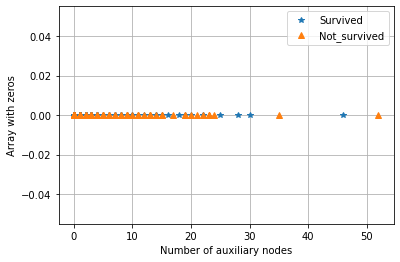

In [ ]:
plt.plot(survived['Axil_nodes'], np.zeros_like(survived['Axil_nodes']), '*', label = 'Survived') 
plt.plot(not_survived['Axil_nodes'], np.zeros_like(not_survived['Axil_nodes']), '^', label = 'Not_survived') 


#adding axis label and display label 
plt.xlabel('Number of auxiliary nodes') 
plt.ylabel('Array with zeros') 
plt.legend()  

plt.grid()
plt.show() 

**Observations:**

1. Most of the values of both classes are overlapped, so we cannot predict anything only on the basis of auxiliary
2. Most of the survival cases and non-survival cases range between 0 to 25 

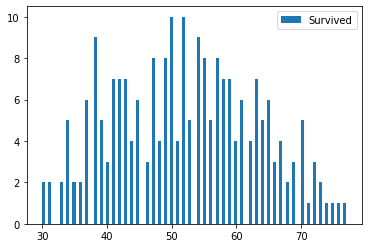

In [8]:
plt.hist(survived["Age"], bins = 100, label = 'Survived')
#plt.hist(survived["Age"],  label = 'Not_survived')
plt.legend()  
plt.show()

**<h1>Bi-variate Plotting / Pair-plots**

Plot with age and oper_year


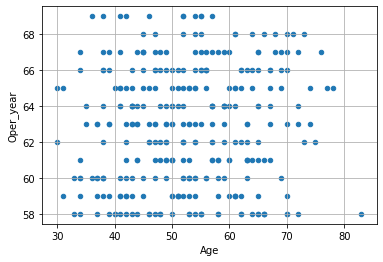

Plot with age and auxiliary node


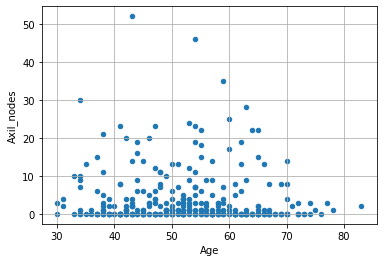

Plot with auxiliary nodes and oper_year


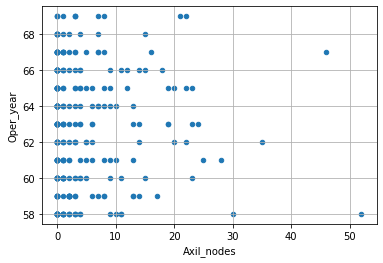

In [ ]:
#data.plot(survived['Age'], survived['Oper_year'], 'rs', not_survived['Age'], not_survived['Oper_year'], 'b*')
print('Plot with age and oper_year')
data.plot(kind='scatter', x='Age', y='Oper_year')
plt.grid()
plt.show()

print('Plot with age and auxiliary node')
data.plot(kind='scatter', x='Age', y='Axil_nodes')
plt.grid()
plt.show()

print('Plot with auxiliary nodes and oper_year')
data.plot(kind='scatter', x='Axil_nodes', y='Oper_year')
plt.grid()
plt.show()

**Observation:**

1. Unable to identify survival and non-survival class as all look same with any of the combinations.

Plot with age and oper_year


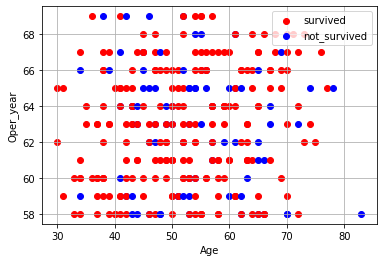

Plot with age and auxiliary node


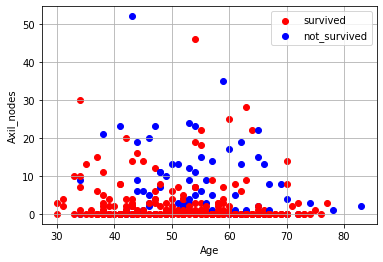

Plot with auxiliary nodes and oper_year


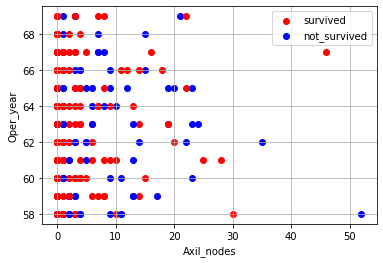

In [9]:
#plotting two attributes in a graph by differtiating survival_status; survived = red, not_survived = blue

print('Plot with age and oper_year')
for n in range(0, 305):
  if data['Survival_status'][n] == 1:
    line1 = plt.scatter(data['Age'][n], data['Oper_year'][n], color = 'red')
  else:
    line2 = plt.scatter(data['Age'][n], data['Oper_year'][n], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Oper_year')  
plt.legend((line1, line2), ('survived', 'not_survived'))
#plt.legend()
plt.grid()
plt.show()


print('Plot with age and auxiliary node')
for n in range(0, 305):
  if data['Survival_status'][n] == 1:
    line1 = plt.scatter(data['Age'][n], data['Axil_nodes'][n], color = 'red')
  else:
    line2 = plt.scatter(data['Age'][n], data['Axil_nodes'][n], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Axil_nodes')  
plt.legend((line1, line2), ('survived', 'not_survived'))
#plt.legend()
plt.grid()
plt.show()


print('Plot with auxiliary nodes and oper_year')
for n in range(0, 305):
  if data['Survival_status'][n] == 1:
    line1 = plt.scatter(data['Axil_nodes'][n], data['Oper_year'][n], color = 'red')
  else:
    line2 = plt.scatter(data['Axil_nodes'][n], data['Oper_year'][n], color = 'blue')
plt.xlabel('Axil_nodes')
plt.ylabel('Oper_year')  
plt.legend((line1, line2), ('survived', 'not_survived'))
#plt.legend()
plt.grid()
plt.show()

**Observations:**
1. It is impossible to differentiate either of the survival state with decision boundary as all are scattered in the whole graph.

2. In the graph, age vs auxiliary node as the value of age and number of nodes increases - the chances of survival state decreases is observed with minimal exceptions.

**<h1>Using some statistical concepts:**

In [10]:
#mean
print('Mean age of survived patients: ', np.mean(survived['Age']))
print('Mean of operation year survived patients: ', np.mean(survived['Oper_year']))
print('Mean affected nodes of survived patients: ', np.mean(survived['Axil_nodes']))

print('Mean age of not survived patients: ', np.mean(not_survived['Age']))
print('Mean of operation year not survived patients: ', np.mean(not_survived['Oper_year']))
print('Mean affected nodes of not survived patients: ', np.mean(not_survived['Axil_nodes']))

Mean age of survived patients:  52.11607142857143
Mean of operation year survived patients:  62.857142857142854
Mean affected nodes of survived patients:  2.799107142857143
Mean age of not survived patients:  53.67901234567901
Mean of operation year not survived patients:  62.82716049382716
Mean affected nodes of not survived patients:  7.45679012345679


**Observation:** 

1. As number of affected nodes increases, there are more likely chances of non-survival


In [11]:
#standard deviation
print('SD age of survived patients: ', np.std(survived['Age']))
print('SD of operation year survived patients: ', np.std(survived['Oper_year']))
print('SD affected nodes of survived patients: ', np.std(survived['Axil_nodes']))

print('SD age of not survived patients: ', np.std(not_survived['Age']))
print('SD of operation year not survived patients: ', np.std(not_survived['Oper_year']))
print('SD affected nodes of not survived patients: ', np.std(not_survived['Axil_nodes']))

SD age of survived patients:  10.913004640364269
SD of operation year survived patients:  3.2220145175061514
SD affected nodes of survived patients:  5.869092706952767
SD age of not survived patients:  10.10418219303131
SD of operation year not survived patients:  3.3214236255207883
SD affected nodes of not survived patients:  9.128776076761632


**Observation:** 

1. Not necessarily, as number of affected nodes increases, there are more likely chances of non-survival

In [12]:
#Median
print('Median age of survived patients: ', np.median(survived['Age']))
print('Median of operation year survived patients: ', np.median(survived['Oper_year']))
print('Median affected nodes of survived patients: ', np.median(survived['Axil_nodes']))

print('Median age of not survived patients: ', np.median(not_survived['Age']))
print('Median of operation year not survived patients: ', np.median(not_survived['Oper_year']))
print('Median affected nodes of not survived patients: ', np.median(not_survived['Axil_nodes']))



Median age of survived patients:  52.0
Median of operation year survived patients:  63.0
Median affected nodes of survived patients:  0.0
Median age of not survived patients:  53.0
Median of operation year not survived patients:  63.0
Median affected nodes of not survived patients:  4.0


In [13]:
#Quantiles 
print('Quantiles of age of survived patients: ', np.percentile(survived['Age'], np.arange(1, 101, 25)))
print('Quantiles of operation year survived patients: ', np.percentile(survived['Oper_year'], np.arange(1, 101, 25)))
print('Quantiles of affected nodes of survived patients: ', np.percentile(survived['Axil_nodes'], np.arange(1, 101, 25)))

print('Quantiles of age of not survived patients: ', np.percentile(not_survived['Age'], np.arange(1, 101, 25)))
print('Quantiles of operation year not survived patients: ', np.percentile(not_survived['Oper_year'], np.arange(1, 101, 25)))
print('Quantiles of affected nodes of not survived patients: ', np.percentile(not_survived['Axil_nodes'], np.arange(1, 101, 25)))




Quantiles of age of survived patients:  [31. 43. 52. 61.]
Quantiles of operation year survived patients:  [58. 60. 63. 66.]
Quantiles of affected nodes of survived patients:  [0. 0. 0. 3.]
Quantiles of age of not survived patients:  [34. 46. 53. 61.]
Quantiles of operation year not survived patients:  [58.  59.8 63.  65. ]
Quantiles of affected nodes of not survived patients:  [ 0.   1.   4.  11.8]


In [14]:
#Percentiles 
print('90th %tile of age for survived patients: ', np.percentile(survived['Age'], 90))
print('90th %tile of operation year for survived patients: ', np.percentile(survived['Oper_year'], 90))
print('90th %tile of affected nodes for survived patients: ', np.percentile(survived['Axil_nodes'], 90))

print('90th %tile of age for survived patients: ', np.percentile(not_survived['Age'], 90))
print('90th %tile of operation year not survived patients: ', np.percentile(not_survived['Oper_year'], 90))
print('90th %tile of affected nodes for not survived patients: ', np.percentile(not_survived['Axil_nodes'], 90))


90th %tile of age for survived patients:  67.0
90th %tile of operation year for survived patients:  67.0
90th %tile of affected nodes for survived patients:  8.0
90th %tile of age for survived patients:  67.0
90th %tile of operation year not survived patients:  67.0
90th %tile of affected nodes for not survived patients:  20.0


**Observation:**

1. Not useful wrt to the goal

**<h1>Whisker & Violin plots</h1>**

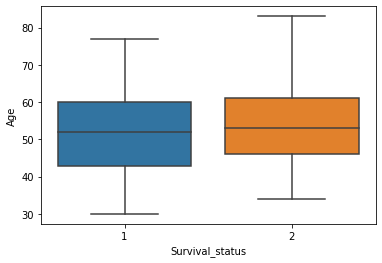

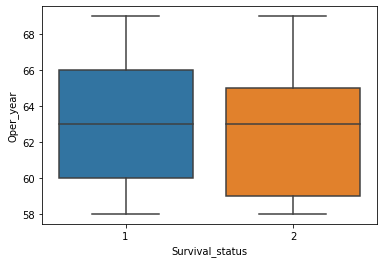

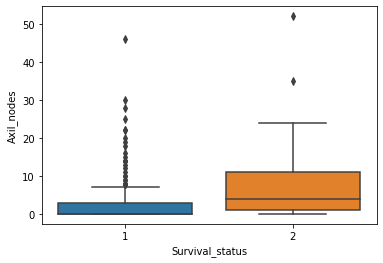

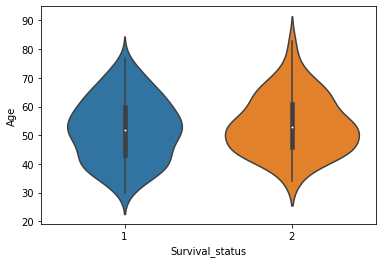

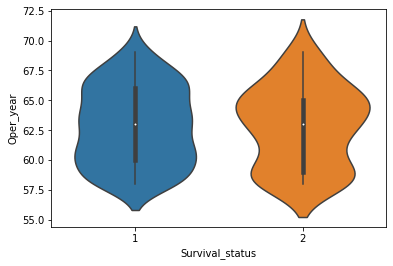

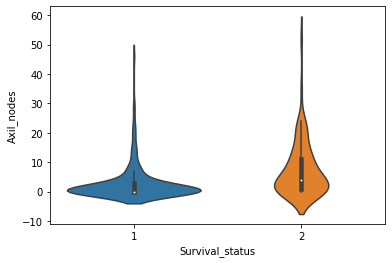

In [17]:
#whisker plot
sns.boxplot(x = 'Survival_status', y = 'Age', data = data)
plt.show()
sns.boxplot(x = 'Survival_status', y = 'Oper_year', data = data)
plt.show()
sns.boxplot(x = 'Survival_status', y = 'Axil_nodes', data = data)
plt.show()

#violin plot
sns.violinplot(x = "Survival_status", y = "Age", data = data, size = 90)
plt.show()
sns.violinplot(x = "Survival_status", y = "Oper_year", data = data, size = 90)
plt.show()
sns.violinplot(x = "Survival_status", y = "Axil_nodes", data = data, size = 90)
plt.show()

**<h1>Histogram, PDF, CDF**



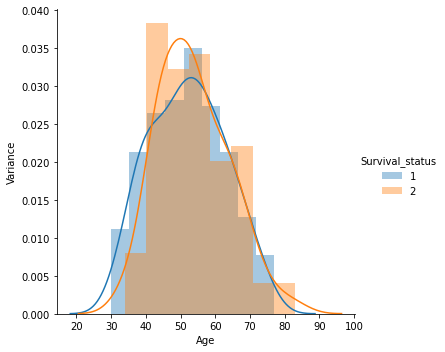

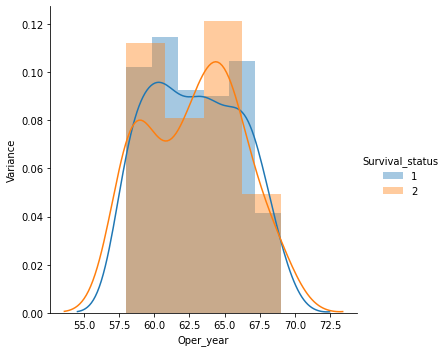

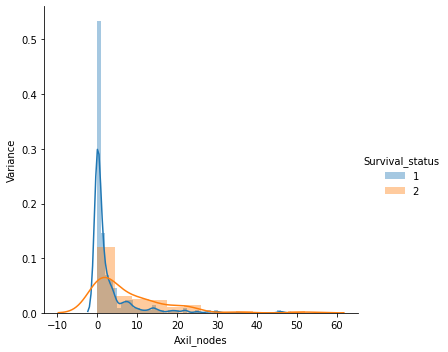

In [ ]:
sns.FacetGrid(data, hue = "Survival_status", height = 5).map(sns.distplot, "Age").add_legend()
plt.ylabel('Variance')
sns.FacetGrid(data, hue = "Survival_status", height = 5).map(sns.distplot, "Oper_year").add_legend()
plt.ylabel('Variance')
sns.FacetGrid(data, hue = "Survival_status", height = 5).map(sns.distplot, "Axil_nodes").add_legend()
plt.ylabel('Variance')
plt.show()

**Observation:**

1. Both classes are overlapping; unable to indentify. 

**CDF & PDF feature-wise**


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


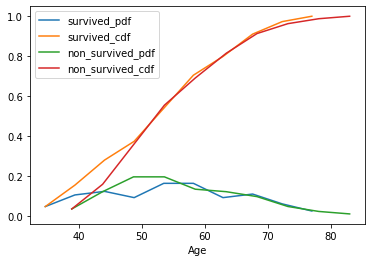

In [ ]:
# plotting cdf and pdf by age feature and survival status
counts, bin_edges = np.histogram(survived['Age'], bins=10, density = True)                               
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel('Age')
plt.plot(bin_edges[1:],pdf, label = 'survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'survived_cdf')

# plotting cdf and pdf by age feature and non survival status
counts, bin_edges = np.histogram(not_survived['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'non_survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'non_survived_cdf')
plt.legend()

plt.show();

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


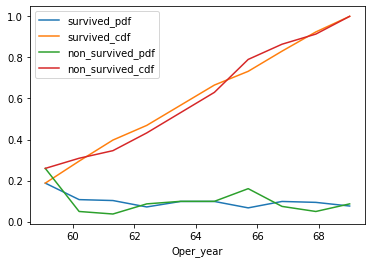

In [ ]:
# plotting cdf and pdf by year of operation feature and survival status
counts, bin_edges = np.histogram(survived['Oper_year'], bins=10, density = True)                               
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel('Oper_year')
plt.plot(bin_edges[1:],pdf, label = 'survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'survived_cdf')

# plotting cdf and pdf by year of operation feature and non survival status
counts, bin_edges = np.histogram(not_survived['Oper_year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'non_survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'non_survived_cdf')
plt.legend()

plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


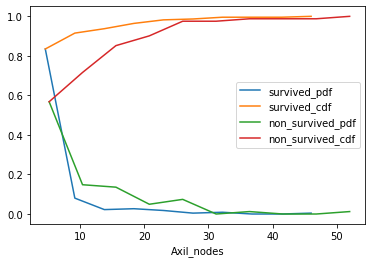

In [ ]:
# plotting cdf and pdf by auxiliary nodes feature and survival status
counts, bin_edges = np.histogram(survived['Axil_nodes'], bins=10, density = True)                               
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel('Axil_nodes')
plt.plot(bin_edges[1:],pdf, label = 'survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'survived_cdf')

# plotting cdf and pdf by auxiliary nodes feature and non survival status
counts, bin_edges = np.histogram(not_survived['Axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'non_survived_pdf')
plt.plot(bin_edges[1:], cdf, label = 'non_survived_cdf')
plt.legend()

plt.show();

**<h1>Observations:</h1>**

1. It is tough to interpret one state of patient and the data is non-uniformly distributed.
2. Somehow, it can be possible that as number of auxiliary nodes and age increases, the rate to survival decreases.